In [26]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# Loading the dataset

data = pd.read_csv("census_income_dataset.csv")
data.head()

,Unnamed: 0,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATION-NUM,MARITAL STATUS,OCCUPATION,RELATIONSHIP,RACE,SEX,CAPITAL-GAIN,CAPITAL-LOSS,HOURS-PER-WEEK,NATIVE-COUNTRY,SALARY
0,0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [27]:
# Checking column names

data.columns

Index(['Unnamed: 0', 'AGE', 'WORKCLASS', 'FNLWGT', 'EDUCATION',
       'EDUCATION-NUM', 'MARITAL STATUS', 'OCCUPATION', 'RELATIONSHIP', 'RACE',
       'SEX', 'CAPITAL-GAIN', 'CAPITAL-LOSS', 'HOURS-PER-WEEK',
       'NATIVE-COUNTRY', 'SALARY'],
      dtype='object')

In [28]:
# Creating a copy of the dataset to work with

df = data.copy()

In [29]:
# Total number of records

len(df)

16281

In [30]:
# Displaying the 'AGE' column

df["AGE"]

0        25
1        38
2        28
3        44
4        18
         ..
16276    39
16277    64
16278    38
16279    44
16280    35
Name: AGE, Length: 16281, dtype: int64

In [31]:
# Checking for missing values in 'AGE' column

df[df["AGE"].isnull()]

,Unnamed: 0,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATION-NUM,MARITAL STATUS,OCCUPATION,RELATIONSHIP,RACE,SEX,CAPITAL-GAIN,CAPITAL-LOSS,HOURS-PER-WEEK,NATIVE-COUNTRY,SALARY


In [32]:
# Displaying the top 10 most frequent ages

df["AGE"].value_counts()[:10]
count = df["AGE"].value_counts()
category = count.index
df["AGE"].value_counts()[:10]


35    461
33    460
23    452
36    450
38    437
31    437
41    427
32    425
37    422
30    417
Name: AGE, dtype: int64

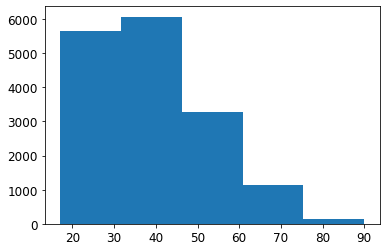

(array([5658., 6066., 3283., 1142.,  132.]),
 array([17. , 31.6, 46.2, 60.8, 75.4, 90. ]),
 <a list of 5 Patch objects>)

In [33]:
# Histogram of the 'AGE' column

ret = plt.hist(df["AGE"], bins=5)
plt.show()
ret

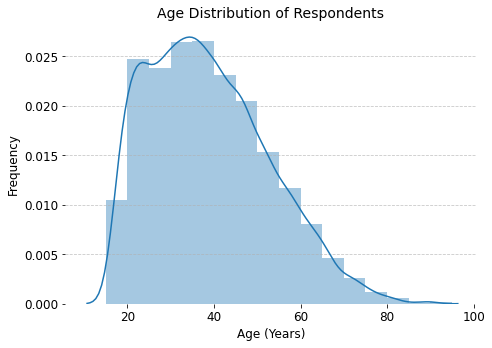

In [34]:
# Defining bins for better visualization

bins = np.arange(10, 100, 5)
plt.figure(figsize=(7,5))
sns.distplot(df["AGE"], kde=True, bins=bins, hist=True)

# Age distribution with Seaborn

plt.title('Age Distribution of Respondents', fontsize=14)
plt.xlabel('Age (Years)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

Mean: 38.76745900128985
Median: 37.0
Mode: 35


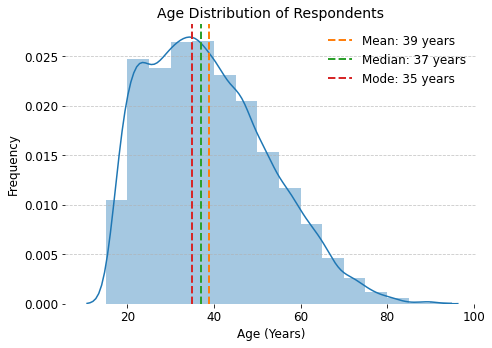

In [35]:
# Repeating the histogram with additional styling

bins = np.arange(10, 100, 5)
plt.figure(figsize=(7,5))
sns.distplot(df["AGE"], kde = True, bins=bins, hist = True)
plt.title('Age Distribution of Respondents', fontsize=14)
plt.xlabel('Age (Years)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine(left=True, bottom=True)
plt.tight_layout()  

mean_age = df["AGE"].mean()
print("Mean:", mean_age)

# median
median_age = df["AGE"].median()
print("Median:", median_age)

# mode
mode_age = df["AGE"].mode().values[0]
print("Mode:", mode_age)


plt.axvline(x=mean_age, ls='--', lw=2, color='tab:orange', label=f'Mean: {mean_age:.0f} years')
plt.axvline(x=median_age, ls='--', lw=2, color='tab:green', label=f'Median: {median_age:.0f} years')
plt.axvline(x=mode_age, ls='--', lw=2, color='tab:red', label=f'Mode: {mode_age:.0f} years')
plt.rcParams['font.size'] = 12 # for now: 12, later: 8


plt.rcParams['svg.fonttype'] = 'none'

plt.legend(frameon=False)
plt.savefig("age_histogram.svg", bbox_inches="tight")
plt.savefig("age_histogram.png", bbox_inches="tight")
plt.show()



In [9]:
df = data.copy()

In [36]:
# Displaying 'RELATIONSHIP' column

df["RELATIONSHIP"]

0              Own-child
1                Husband
2                Husband
3                Husband
4              Own-child
              ...       
16276      Not-in-family
16277     Other-relative
16278            Husband
16279          Own-child
16280            Husband
Name: RELATIONSHIP, Length: 16281, dtype: object

In [37]:
# Checking for missing values in 'RELATIONSHIP'

df["RELATIONSHIP"].isnull().sum()

0

In [38]:
# Counting unique values in 'RELATIONSHIP'

df["RELATIONSHIP"].value_counts()

 Husband           6523
 Not-in-family     4278
 Own-child         2513
 Unmarried         1679
 Wife               763
 Other-relative     525
Name: RELATIONSHIP, dtype: int64

In [39]:
# Storing relationship category counts

count = df["RELATIONSHIP"].value_counts()
category = count.index
count = count.values
count, category

(array([6523, 4278, 2513, 1679,  763,  525], dtype=int64),
 Index([' Husband', ' Not-in-family', ' Own-child', ' Unmarried', ' Wife',
        ' Other-relative'],
       dtype='object'))

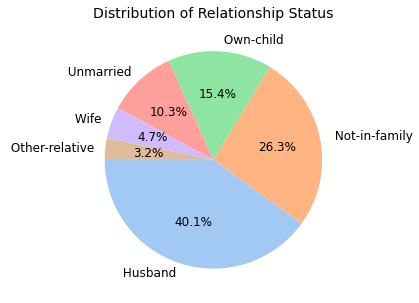

In [40]:
# Pie chart for relationship distribution

plt.figure(figsize=(7,5))
status_counts = df['RELATIONSHIP'].value_counts()

status_counts.plot(kind='pie', autopct='%1.1f%%', startangle=180, colors=sns.color_palette('pastel'))
plt.title('Distribution of Relationship Status', fontsize=14)
plt.ylabel('')  # Hide the y-label
plt.rcParams['font.size'] = 12 # for now: 12, later: 8

# Make the text editable (in the SVG file)
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig("relationship_pie_chart.svg", bbox_inches="tight")
plt.show()


In [16]:
df = data.copy()

In [41]:
# Checking education distribution

df["EDUCATION"].value_counts()

 HS-grad         5283
 Some-college    3587
 Bachelors       2670
 Masters          934
 Assoc-voc        679
 11th             637
 Assoc-acdm       534
 10th             456
 7th-8th          309
 Prof-school      258
 9th              242
 12th             224
 Doctorate        181
 5th-6th          176
 1st-4th           79
 Preschool         32
Name: EDUCATION, dtype: int64

In [42]:
# Checking salary distribution

df["SALARY"].value_counts()

 <=50K    12435
 >50K      3846
Name: SALARY, dtype: int64

In [43]:
# Creating salary distribution by education level

salary_distribution = df.groupby(['EDUCATION', 'SALARY']).size().unstack(fill_value=0)
salary_distribution

SALARY,<=50K,>50K
EDUCATION,,
10th,431,25
11th,605,32
12th,209,15
1st-4th,77,2
5th-6th,165,11
7th-8th,287,22
9th,228,14
Assoc-acdm,386,148
Assoc-voc,518,161


<Figure size 432x288 with 0 Axes>

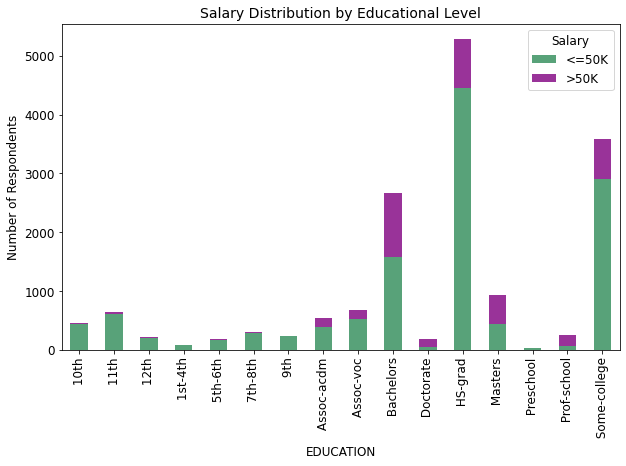

In [44]:
# Plotting a stacked bar chart for salary distribution by education level

plt.figure()
salary_distribution = df.groupby(['EDUCATION', 'SALARY']).size().unstack(fill_value=0)

# Stacked Bar Chart
salary_distribution.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#2E8B57', '#800080'], alpha=0.8)
plt.title('Salary Distribution by Educational Level', fontsize=14)
plt.ylabel('Number of Respondents', fontsize=12)
plt.legend(title='Salary', labels=['<=50K', '>50K'])

plt.show()

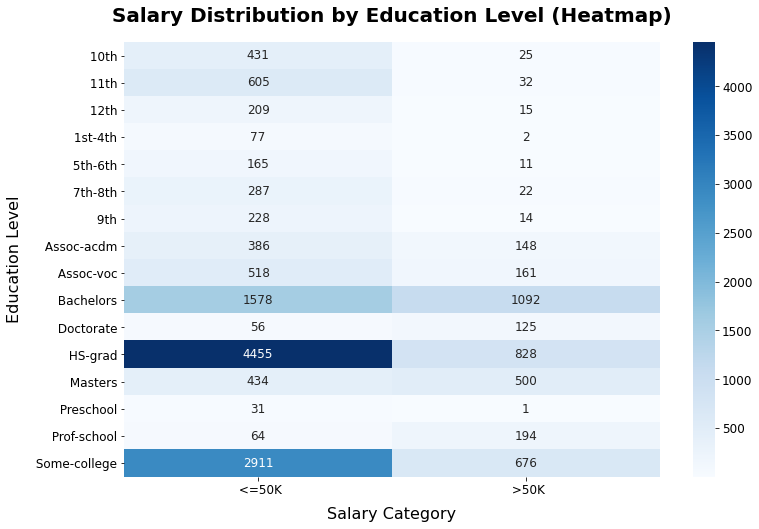

In [45]:
# Plotting a heatmap for salary distribution by education level

plt.figure(figsize=(12, 8))
sns.heatmap(salary_distribution, annot=True, fmt='d', cmap='Blues')
plt.title('Salary Distribution by Education Level (Heatmap)', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Salary Category', fontsize=16, labelpad=10)
plt.ylabel('Education Level', fontsize=16, labelpad=10)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.show()

<Figure size 432x288 with 0 Axes>

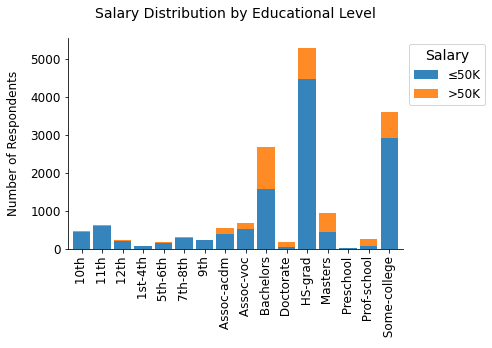

In [46]:
# Another version of the stacked bar chart with more styling

plt.figure()
salary_distribution = df.groupby(['EDUCATION', 'SALARY']).size().unstack(fill_value=0)

# Stacked Bar Chart
fig, ax = plt.subplots(figsize=(7, 5))
salary_distribution.plot(kind='bar', stacked=True, ax=ax, width=0.85, alpha=0.9)

# Titles and Labels
ax.set_title('Salary Distribution by Educational Level', fontsize=14, pad=20)
ax.set_ylabel('Number of Respondents', fontsize=12, labelpad=10)
ax.set_xlabel('')

# Ticks
ax.set_xticks(range(len(salary_distribution.index)))
ax.set_xticklabels(salary_distribution.index, fontsize=12)
ax.tick_params(axis='y', labelsize=12)
sns.despine(trim=False)
plt.legend(frameon=False)
plt.rcParams['font.size'] = 12 # for now: 12, later: 8

# Make the text editable (in the SVG file)
plt.rcParams['svg.fonttype'] = 'none'
# Legend
ax.legend(title='Salary', labels=['≤50K', '>50K'], fontsize=12, title_fontsize=14, loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.savefig("Salary_dist_by_edu_level.svg", bbox_inches="tight")
plt.show()
